# Data Analysis 2025

## Chapter IV: Linear Regression

### Learning Goals
- Formulate learning problems using appropriate loss functions
- Indicate ways of finding the optimal parameters of a model
- Develop & experiment linear regression models (simple and multiple) 
- Assess the fit of regression models in different ways
- Diagnose a bad fit in different ways
- Determine proper transformations for variables in modelling (e.g. linearization, categorical variables)
- Explain the concepts of over/under-fitting and the bias/variance trade-off
- Assess when a model is leaning towards overfitting
- Apply cross-validation (CV) (and K-fold CV) to your models
- Explain concepts like data leakage

# Announcements

- Clinic 1 is due this Friday (late night). Wildcards are available and they apply to the whole group.
- If you still don't have a group, use Discord to self-organize
- The "wildcards standout dilemma" : If you keep the same group for all clinics, then things are easy. If you change groups per clinic, then things become tricky.
  * e.g. if your groups submits clinic 1 3 days late, then each of the group members uses 3 wildcards (fair and square). If for clinic 2 there is a different composition with different wildcard balances among team members and in order to avoid system misuse, the group remaining wildcard balance will be computed the minimum of wildcards available (i.e. if 1 members has used 4 wildcards and 2 members have used 2 wildcards, then the group has an overall balance of 2 wildcards left).

- Quizz 1 is avalable, Bootcamp 1 solution will be available shortly
- Bootcamps are graded on participation and are meant to be (mostly) completed in class

# Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Supervised Learning: Notations and Basics

### A Supervised Learning Dataset: Notation

We say that a training dataset of size $n$ (e.g., $n$ patients) is a set
$$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$$

Each $x^{(i)}$ denotes an input (e.g., the measurements for patient $i$), and each $y^{(i)} \in \mathcal{Y}$ is a target (e.g., the diabetes risk). 

Together, $(x^{(i)}, y^{(i)})$ form a *training example*.

### Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

We refer to the variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

Often, an input object has many attributes, and we want to use these attributes to define more complex descriptions of the input.

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*, however in practice sometimes the terms are used interchangeably.

### Training Dataset: Targets

For each patient, we are interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

### Objectives: Notation

<!-- Given a training set, how do we pick the parameters $\theta$ for the model? A natural approach is to select $\theta$ such that $f_\theta(x^{(i)})$ is close to $y^{(i)}$ on a training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$. -->

To capture this intuition, we define an *objective function* (also called a *loss function*)

$$J(f) : \mathcal{M} \to [0, \infty), $$

which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.


When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$

 <span style="color:grey;">Error-based objective functions for regression are typically lower-bounded by 0, but in general may take any real value (e.g., for classification)</span>

### Objective: Examples

What would are some possible objective functions? We will see many, but here are a few examples:
* Mean squared error: $$J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$J(\theta) = \frac{1}{n} \sum_{i=1}^n \left| f_\theta(x^{(i)}) - y^{(i)} \right|$$

These are defined for a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

### Optimizer: Example

We will see that behind the scenes, the `sklearn.linear_models.LinearRegression` algorithm optimizes the MSE loss.
When $\mathcal{X}=\mathbb{R}$, $\Theta=\mathbb{R}^2$ for the intercept and slop terms.

\begin{align*}
\min_{\theta \in \mathbb{R}^2} \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align*}

We can easily measure the quality of the fit on the training set and the test set.

# Part 1: Calculus Review

Before we present our first supervised learning algorithm, we will do a quick calculus review.

In class we will only discuss the basics of gradient descent but feel free to browse through the rest for a reminder.

# Motivation: Optimization in ML

A machine learning algorithm typically minimizes a loss function $J$, e.g.,:

$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$

The optimizer outputs parameters $\theta$ that best "fit" the training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

We will use the a quadratic function as our running example for an objective $J$.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
import seaborn as sns

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = "iframe"
pio.templates["plotly"].layout.colorway = px.colors.qualitative.Vivid
px.defaults.width = 800

In [2]:
def quadratic_function(theta):
    """The cost function, J(theta)."""
    return 0.5*(2*theta-1)**2

We can visualize it.

Text(0.5, 1.0, 'Simple quadratic function')

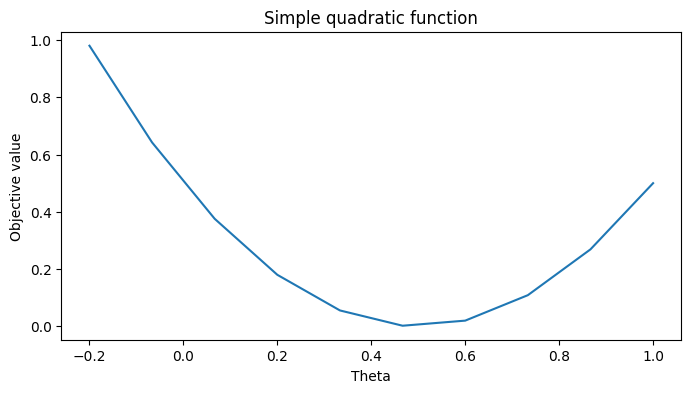

In [3]:
# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
thetas = np.linspace(-0.2,1,10)
f_vals = quadratic_function(thetas[:,np.newaxis])

plt.plot(thetas, f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

# Calculus Review: Derivatives

Recall that the derivative 

$$\frac{d f(\theta_0)}{d \theta}$$ 

of a univariate function $f : \mathbb{R} \to \mathbb{R}$ is the instantaneous rate of change of the function $f(\theta)$ with respect to its parameter $\theta$ at the point $\theta_0$.

Text(0.5, 1.0, 'Simple quadratic function')

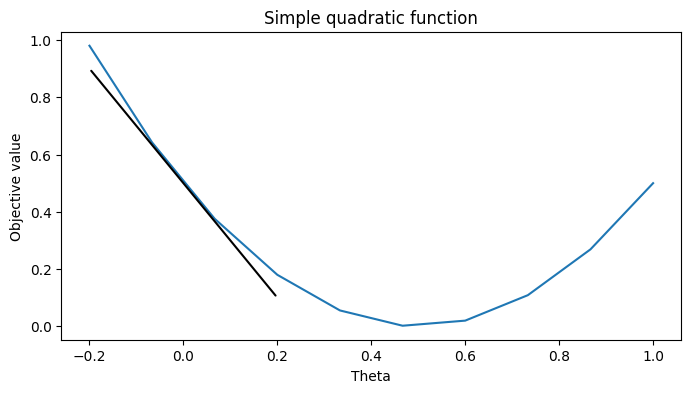

In [4]:
def quadratic_derivative(theta):
    return (2*theta-1)*2

df0 = quadratic_derivative(np.array([[0]])) # derivative at zero
f0 = quadratic_function(np.array([[0]]))
line_length = 0.2

plt.plot(thetas, f_vals)
plt.annotate('', xytext=(0-line_length, f0-line_length*df0), xy=(0+line_length, f0+line_length*df0),
             arrowprops={'arrowstyle': '-', 'lw': 1.5}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

Text(0.5, 1.0, 'Simple quadratic function')

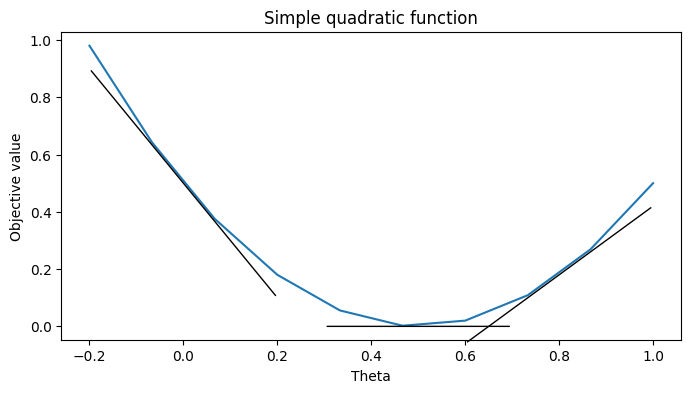

In [5]:
pts = np.array([[0, 0.5, 0.8]]).reshape((3,1))
df0s = quadratic_derivative(pts)
f0s = quadratic_function(pts)

plt.plot(thetas, f_vals)
for pt, f0, df0 in zip(pts.flatten(), f0s.flatten(), df0s.flatten()): 
    plt.annotate('', xytext=(pt-line_length, f0-line_length*df0), xy=(pt+line_length, f0+line_length*df0),
             arrowprops={'arrowstyle': '-', 'lw': 1}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

# Calculus Review: Partial Derivatives

The partial derivative 

$$\frac{\partial f(\theta)}{\partial \theta_j}$$ 

of a multivariate function $f : \mathbb{R}^d \to \mathbb{R}$ is the derivative of $f$ with respect to $\theta_j$ while all the other dimensions $\theta_k$ for $k\neq j$ are fixed.

# Calculus Review: The Gradient

The gradient $\nabla f$ is the vector of all the partial derivatives:

$$ \nabla f (\theta) = \begin{bmatrix}
\frac{\partial f(\theta)}{\partial \theta_1} \\
\frac{\partial f(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta)}{\partial \theta_d}
\end{bmatrix}.$$

The $j$-th entry of the vector $\nabla f (\theta)$ is the partial derivative $\frac{\partial f(\theta)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

We will use a quadratic function as a running example.

$$ f(\theta_0,\theta_1)=\frac{1}{2}\left ( (2\theta_1 -2)^2 + (\theta_0 -3 )^2 \right )$$

In [94]:
def quadratic_function2d(theta0, theta1):
    """Quadratic objective function, J(theta0, theta1).
    
    The inputs theta0, theta1 are 2d arrays and we evaluate
    the objective at each value theta0[i,j], theta1[i,j].
    We implement it this way so it's easier to plot the
    level curves of the function in 2d.

    Parameters:
    theta0 (np.array): 2d array of first parameter theta0
    theta1 (np.array): 2d array of second parameter theta1
    
    Returns:
    fvals (np.array): 2d array of objective function values
        fvals is the same dimension as theta0 and theta1.
        fvals[i,j] is the value at theta0[i,j] and theta1[i,j].
    """
    theta0 = np.atleast_2d(np.asarray(theta0))
    theta1 = np.atleast_2d(np.asarray(theta1))
    return 0.5*((2*theta1-2)**2 + (theta0-3)**2)

Let's visualize this function.

(-4.0, 7.0, -1.0, 4.0)

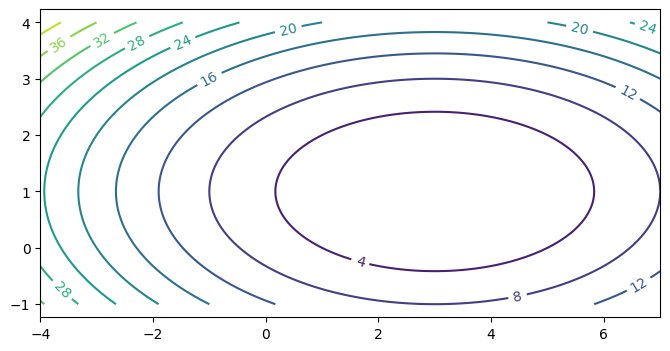

In [95]:
theta0_grid = np.linspace(-4,7,101)
theta1_grid = np.linspace(-1,4,101)
theta_grid = theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis]
J_grid = quadratic_function2d(theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis])

X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.axis('equal')

Let's write down the gradient of the quadratic function.

$$ \nabla f(\theta_0,\theta_1)=[\theta_0-3,(2\theta_1 -2)\times 2 ]$$

In [96]:
def quadratic_derivative2d(theta0, theta1):
    """Derivative of quadratic objective function.
    
    The inputs theta0, theta1 are 1d arrays and we evaluate
    the derivative at each value theta0[i], theta1[i].

    Parameters:
    theta0 (np.array): 1d array of first parameter theta0
    theta1 (np.array): 1d array of second parameter theta1
    
    Returns:
    grads (np.array): 2d array of partial derivatives
        grads is of the same size as theta0 and theta1
        along first dimension and of size
        two along the second dimension.
        grads[i,j] is the j-th partial derivative 
        at input theta0[i], theta1[i].
    """
    # this is the gradient of 0.5*((2*theta1-2)**2 + (theta0-3)**2)
    grads = np.stack([theta0-3, (2*theta1-2)*2], axis=1)
    grads = grads.reshape([len(theta0), 2])
    return grads

We can visualize the gradient.

(-4.0, 7.0, -1.0, 4.0)

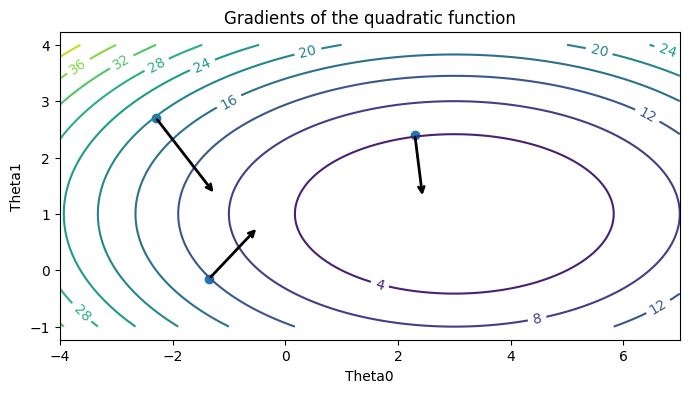

In [101]:
theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4, -0.15, 2.71])
dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

contours = plt.contour(X, Y, J_grid, 10)
for theta0_pt, theta1_pt, df0 in zip(theta0_pts, theta1_pts, dfs):
    plt.annotate('', xytext=(theta0_pt, theta1_pt), 
                     xy=(theta0_pt-line_length*df0[0], theta1_pt-line_length*df0[1]),
                     arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.scatter(theta0_pts, theta1_pts)
plt.clabel(contours)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients of the quadratic function')
plt.axis('equal')

# Part 1b: Gradient Descent

Next, we will use gradients to define an important algorithm called *gradient descent*.

# Calculus Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

The $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

(-4.0, 7.0, -1.0, 4.0)

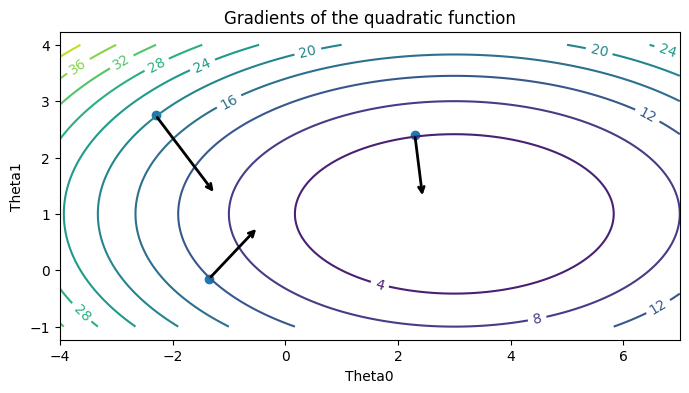

In [10]:
theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4, -0.15, 2.75])
dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

contours = plt.contour(X, Y, J_grid, 10)
for theta0_pt, theta1_pt, df0 in zip(theta0_pts, theta1_pts, dfs):
    plt.annotate('', xytext=(theta0_pt, theta1_pt), 
                     xy=(theta0_pt-line_length*df0[0], theta1_pt-line_length*df0[1]),
                     arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.scatter(theta0_pts, theta1_pts)
plt.clabel(contours)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients of the quadratic function')
plt.axis('equal')

# Gradient Descent: Intuition

Gradient descent is a very common optimization algorithm used in machine learning.

The intuition behind gradient descent is to repeatedly obtain the gradient to determine the direction in which the function decreases most steeply and take a step in that direction.

# Gradient Descent: Notation
More formally, if we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update until $\theta$ is no longer changing:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla J(\theta_{i-1}). $$

In code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```
In the above algorithm, we stop when $||\theta_i - \theta_{i-1}||$ is small.

It's easy to implement this function in `numpy`.

In [108]:
convergence_threshold = 0.1
step_size = 0.2
theta, theta_prev = np.array([[-2], [3]]), np.array([[0], [0]])
opt_pts = [theta.flatten()]
opt_grads = []

while np.linalg.norm(theta - theta_prev) > convergence_threshold:
    # we repeat this while the value of the function is decreasing
    theta_prev = theta
    gradient = quadratic_derivative2d(*theta).reshape([2,1])
    theta = theta_prev - step_size * gradient
    opt_pts += [theta.flatten()]
    opt_grads += [gradient.flatten()]

We can now visualize gradient descent.

(-4.0, 7.0, -1.0, 4.0)

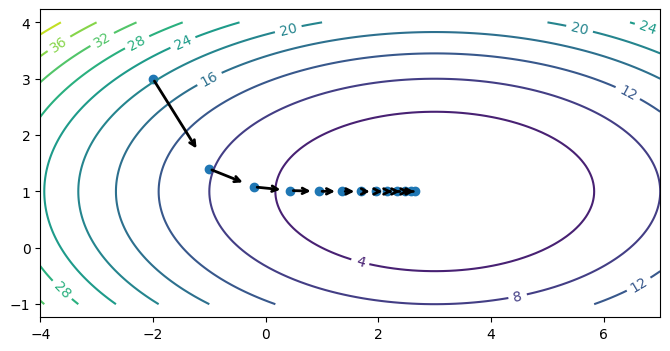

In [109]:
opt_pts = np.array(opt_pts)
opt_grads = np.array(opt_grads)

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.scatter(opt_pts[:,0], opt_pts[:,1])

for opt_pt, opt_grad in zip(opt_pts, opt_grads):
    plt.annotate('', xytext=(opt_pt[0], opt_pt[1]), 
                 xy=(opt_pt[0]-0.8*step_size*opt_grad[0], opt_pt[1]-0.8*step_size*opt_grad[1]),
                 arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')

plt.axis('equal')

# Part 2: Gradient Descent in Linear Models

Let's now use gradient descent to derive a supervised learning algorithm for linear models.

# Review: Gradient Descent
If we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```

# Review: Linear Model Family

Recall that a linear model has the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x \in \mathbb{R}^d$ is a vector of features and $y$ is the target. The $\theta_j$ are the *parameters* of the model.

By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ f_\theta(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

Let's define our model in Python.

In [13]:
def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta)

# An Objective: Mean Squared Error

We pick $\theta$ to minimize the mean squared error (MSE). Slight variants of this objective are also known as the residual sum of squares (RSS) or the sum of squared residuals (SSR).
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
In other words, we are looking for the best "compromise" in $\theta$ over all the data points.

## POLL:

<img src="wooclap.png" alt="drawing" width="500"/>

### Here we use as an objective function the mean squared error for each training point $i$ which is defined as $(y^{(i)}-\theta^\top x^{(i)})^2$. Would it be also okay to use the following functions?

### i) $y^{(i)}-\theta^\top x^{(i)}$
### ii) $|y^{(i)}-\theta^\top x^{(i)}|$

<br>

### A. yeah both
### B. none of them 
### C. only i)
### D. only ii)
### E. unicorns are black

Let's implement the mean squared error.

In [110]:
def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

# Mean Squared Error: Partial Derivatives

Let's work out the derivatives for $\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2,$ the MSE of a linear model $f_\theta$ for one training example $(x^{(i)}, y^{(i)})$, which we denote $J^{(i)}(\theta)$.

\begin{align*}
\frac{\partial}{\partial \theta_j} J^{(i)}(\theta) & = \frac{\partial}{\partial \theta_j} \left(\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2\right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( f_\theta(x^{(i)}) - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( \sum_{k=0}^d \theta_k \cdot x^{(i)}_k - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j
\end{align*}

# Mean Squared Error: The Gradient

We can use this derivation to obtain an expression for the gradient of the MSE for a linear model

\begin{align*}
\small
{\tiny \nabla_\theta J^{(i)} (\theta)} = \begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\begin{bmatrix}
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_0 \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_1 \\
\vdots \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_d
\end{bmatrix}
=
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Note that the MSE over the entire dataset is $J(\theta) = \frac{1}{n}\sum_{i=1}^n J^{(i)}(\theta)$. Therefore:

\begin{align*}
\nabla_\theta J (\theta) = \begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n}\sum_{i=1}^n
\begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Let's implement the gradient.

In [15]:
def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix 
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

# The UCI Diabetes Dataset

In this section, we are going to use the UCI Diabetes Dataset.
* For each patient we have a access to their BMI and an estimate of diabetes risk (from 0-400).
* We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

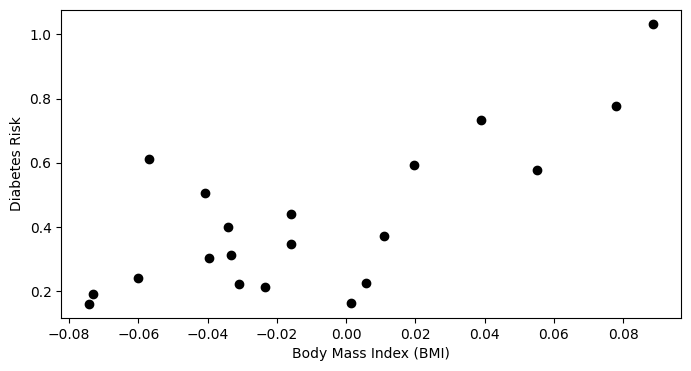

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of ones (remember this is the X_0)
# alternatively, it's the intercept
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'one']]
y_train = y.iloc[-20:] / 300

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk') 

# Gradient Descent for Linear Regression

Putting this together with the gradient descent algorithm, we obtain a learning method for training linear models.


```python
theta, theta_prev = random_initialization()
while abs(J(theta) - J(theta_prev)) > conv_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * (f(x, theta)-y) * x
```

This update rule is also known as the Least Mean Squares (LMS).

In [117]:
threshold = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701
Iteration 500. MSE: 0.013450
Iteration 600. MSE: 0.013238
Iteration 700. MSE: 0.013060
Iteration 800. MSE: 0.012909
Iteration 900. MSE: 0.012781
Iteration 1000. MSE: 0.012674
Iteration 1100. MSE: 0.012583
Iteration 1200. MSE: 0.012506
Iteration 1300. MSE: 0.012441
Iteration 1400. MSE: 0.012386
Iteration 1500. MSE: 0.012340
Iteration 1600. MSE: 0.012301
Iteration 1700. MSE: 0.012268
Iteration 1800. MSE: 0.012240
Iteration 1900. MSE: 0.012217
Iteration 2000. MSE: 0.012197
Iteration 2100. MSE: 0.012180
Iteration 2200. MSE: 0.012166
Iteration 2300. MSE: 0.012154
Iteration 2400. MSE: 0.012144
Iteration 2500. MSE: 0.012135
Iteration 2600. MSE: 0.012128
Iteration 2700. MSE: 0.012122
Iteration 2800. MSE: 0.012117
Iteration 2900. MSE: 0.012112
Iteration 3000. MSE: 0.012109
Iteration 3100. MSE: 0.012106
Iteration 3200. MSE: 0.012103
Iteration 3300. MSE: 0

Text(0, 0.5, 'Diabetes Risk')

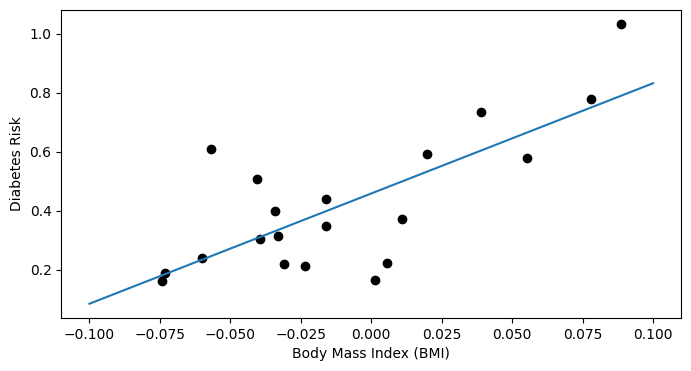

In [126]:
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.plot(x_line[0], y_line)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

In [125]:
optimal_theta=opt_pts[-1]
print(optimal_theta)

bmi    3.736702
one    0.457953
dtype: float64


### What do these coefficients show us?

$$ y = \theta_0 + \theta_1 \times x $$

where $x$ is the bmi input and $y$ is the diabetes risk.

- $\theta_0$ ($0.457985$ in this case) is the diabetes risk for a patient with BMI 0. In the context of this problem it does not make sense. It controls the line vertically.

- $\theta_1$ ($3.736702$ in this case) means that for every 1 unit increase in BMI, the diabetes risk increases by approx. $3.73$ units. Pay attention, all units are the units that each variable is measured in when input to the model. It controls how steep is the line (angle).

# Part 3: Ordinary Least Squares

In practice, there is a more effective way than gradient descent to find linear model parameters.

This method will produce one of the most basic algorithms: Ordinary Least Squares.

# Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

In other words, the $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

# The UCI Diabetes Dataset

In this section, we are going to again use the UCI Diabetes Dataset.
* For each patient we have a access to a measurement of their body mass index (BMI) and a quantitative diabetes risk score (from 0-300). 
* We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

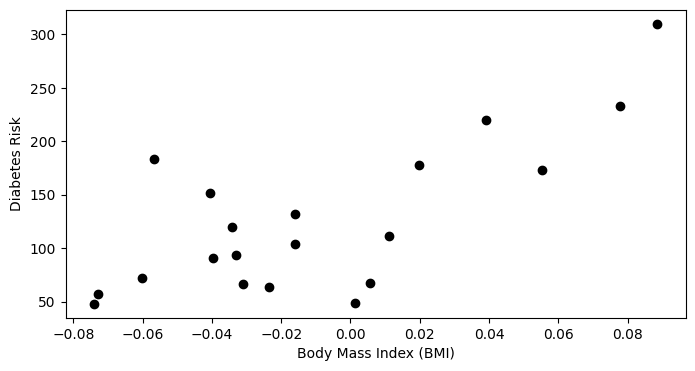

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

# Notation: Design Matrix

<!-- Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features. -->

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:

$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_d
\end{bmatrix}
=
\begin{bmatrix}
- & (x^{(1)})^\top & - \\
- & (x^{(2)})^\top & - \\
& \vdots & \\
- & (x^{(n)})^\top & - \\
\end{bmatrix}
.$$

We can view the design matrix for the diabetes dataset.

In [138]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,1
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,1
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,1
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,1
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,1


# Notation: Target Vector


Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}.$$

# Squared Error in Matrix Form

Recall that we may fit a linear model by choosing $\theta$ that minimizes the squared error:
$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$

We can write this sum in matrix-vector form as:
$$J(\theta) = \frac{1}{2} (y-X\theta)^\top(y-X\theta) = \frac{1}{2} \|y-X\theta\|^2,$$
where $X$ is the design matrix and $\|\cdot\|$ denotes the Euclidean norm.

# The Gradient of the Squared Error

We can compute the gradient of the mean squared error as follows.

\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^\top  (X \theta - y) \\
& = \frac{1}{2} \nabla_\theta \left( (X \theta)^\top  (X \theta) - (X \theta)^\top y - y^\top (X \theta) + y^\top y \right) \\
& = \frac{1}{2} \nabla_\theta \left( \theta^\top  (X^\top X) \theta - 2(X \theta)^\top y \right) \\
& = \frac{1}{2} \left( 2(X^\top X) \theta - 2X^\top y \right) \\
& = (X^\top X) \theta - X^\top y
\end{align*}

We used the facts that $a^\top b = b^\top a$ (line 3), that $\nabla_x b^\top x = b$ (line 4), and that $\nabla_x x^\top A x = 2 A x$ for a symmetric matrix $A$ (line 4).

# Normal Equations

<!-- We know from calculus that a function is minimized when its derivative is set to zero. In our case, our objective function is a (multivariate) quadratic; hence it only has one minimum, which is the global minimum.
 -->
Setting the above derivative to zero, we obtain the *normal equations*:
$$ (X^\top X) \theta = X^\top y.$$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$

Note that we assumed that the matrix $(X^\top X)$ is invertible; there are simple ways to deal with non-invertible matrices.

Let's apply the normal equations.

In [139]:
import numpy as np

theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.888868,204.648785,-64.289163,-262.796691,14003.726808,-11798.307781,-5892.15807,-1136.947646,-2736.597108,-393.879743,155.698998


We can now use our estimate of theta to compute predictions for 3 new data points.

In [146]:
# Collect 3 data points for testing
X_test = X.iloc[:3]
y_test = y.iloc[:3]

# generate predictions on the new patients
y_test_pred = X_test.dot(theta_best)

Let's visualize these predictions.

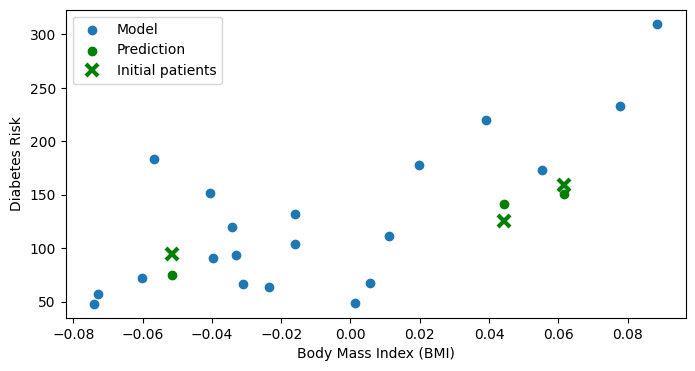

In [147]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_train.loc[:, ['bmi']], y_train)
plt.scatter(X_test.loc[:, ['bmi']], y_test, color='green', marker='o')
plt.plot(X_test.loc[:, ['bmi']], y_test_pred, 'x', color='green', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

# Algorithm: Ordinary Least Squares

* __Type__: Supervised learning (regression)
* __Model family__: Linear models
* __Objective function__: Mean squared error
* __Optimizer__: Normal equations

It is preferred to gradient descent since it does not require any parameter tuning.

# Part 4: Non-Linear Least Squares

So far, we have learned about a very simple linear model. Linear models can capture only simple linear relationships in the data. Can we also use it to model more complex relationships?

# Review: Polynomial Functions

Recall that a polynomial of degree $p$ is a function of the form
$$
a_p x^p + a_{p-1} x^{p-1} + ... + a_{1} x + a_0.
$$

Below are some examples of polynomial functions.

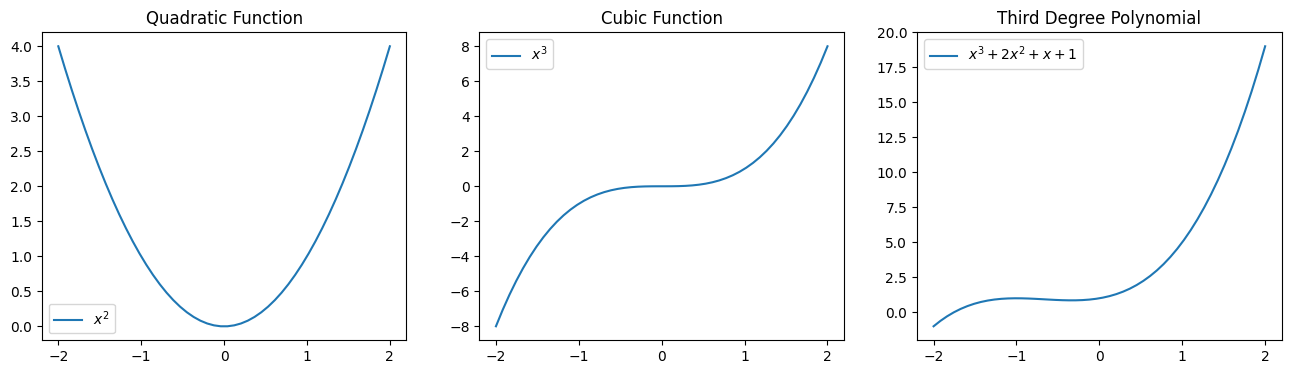

In [148]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-2, 2)

plt.subplot(131)
plt.title('Quadratic Function')
plt.plot(x_vars, x_vars**2)
plt.legend(["$x^2$"])

plt.subplot(132)
plt.title('Cubic Function')
plt.plot(x_vars, x_vars**3)
plt.legend(["$x^3$"])

plt.subplot(133)
plt.title('Third Degree Polynomial')
plt.plot(x_vars, x_vars**3 + 2*x_vars**2 + x_vars + 1)
plt.legend(["$x^3 + 2 x^2 + x + 1$"])

# Modeling Non-Linear Relationships With Polynomial Regression

<!-- Note that the set of $p$-th degree polynomials forms a linear model with parameters $a_p, a_{p-1}, ..., a_0$.
This means we can use our algorithms for linear models to learn non-linear features! -->

Specifically, given a one-dimensional continuous variable $x$, we can define the *polynomial feature* function $\phi : \mathbb{R} \to \mathbb{R}^{p+1}$ as
$$ \phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

The class of models of the form
$$ f_\theta(x) := \sum_{j=0}^p \theta_j x^j = \theta^\top \phi(x) $$
with parameters $\theta$ and polynomial features $\phi$ is the set of $p$-degree polynomials.

* This model is non-linear in the input variable $x$, meaning that we can model complex data relationships.

* It is a linear model as a function of the parameters $\theta$, meaning that we can use the ordinary least squares algorithm to learn these features.

# The UCI Diabetes Dataset

In this section, we are going to again use the UCI Diabetes Dataset.
* For each patient we have a access to a measurement of their body mass index (BMI) and a quantitative diabetes risk score (from 0-300). 
* We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

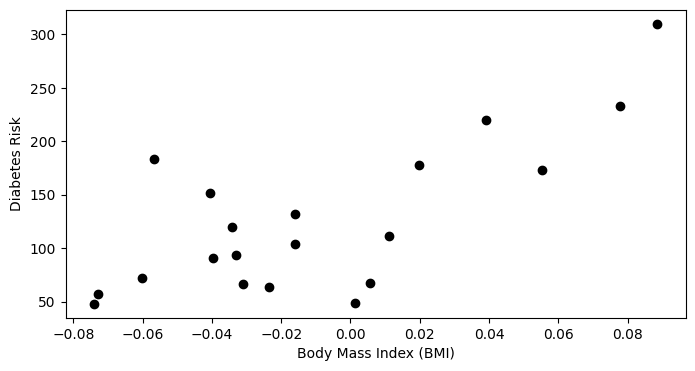

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of ones
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

# Diabetes Dataset: A Non-Linear Featurization

Let's now obtain linear features for this dataset.

In [150]:
X_bmi = X_train.loc[:, ['bmi']]

X_bmi_p3 = pd.concat([X_bmi, X_bmi**2, X_bmi**3], axis=1)
X_bmi_p3.columns = ['bmi', 'bmi2', 'bmi3']
X_bmi_p3['one'] = 1
X_bmi_p3.head()

,bmi,bmi2,bmi3,one
422,0.077863,0.006063,0.000472,1
423,-0.039618,0.001570,-0.000062,1
424,0.011039,0.000122,0.000001,1
425,-0.040696,0.001656,-0.000067,1
426,-0.034229,0.001172,-0.000040,1


# Diabetes Dataset: A Polynomial Model

By training a linear model on this featurization of the diabetes set, we can obtain a polynomial model of diabetes risk as a function of BMI.

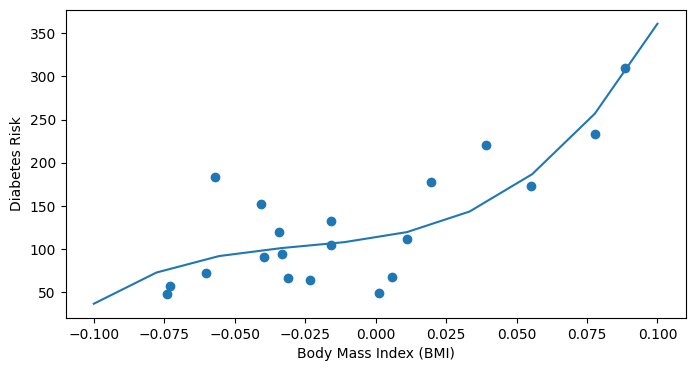

In [151]:
# Fit a linear regression
theta = np.linalg.inv(X_bmi_p3.T.dot(X_bmi_p3)).dot(X_bmi_p3.T).dot(y_train)

# Show the learned polynomial curve
x_line = np.linspace(-0.1, 0.1, 10)
x_line_p3 = np.stack([x_line, x_line**2, x_line**3, np.ones(10,)], axis=1)
y_train_pred = x_line_p3.dot(theta)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)

# Multivariate Polynomial Regression

We can construct non-linear functions of multiple variables by using multivariate polynomials.

For example, a polynomial of degree $2$ over two variables $x_1, x_2$ is a function of the form
<!-- $$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{22} x_1^2 x_2^2 + a_{21} x_1^2 x_2 + a_{12} x_1 x_2^2 + a_11 x_1 x_2 + a_{00}.
$$ -->
$$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{11} x_1 x_2 + a_{00}.
$$

In general, a polynomial of degree $p$ over two variables $x_1, x_2$ is a function of the form
$$
f(x_1, x_2) = \sum_{i,j \geq 0 : i+j \leq p} a_{ij} x_1^i x_2^j.
$$

In our two-dimensional example, this corresponds to a feature function $\phi : \mathbb{R}^2 \to \mathbb{R}^6$ of the form
$$ \phi(x) = \begin{bmatrix}
1 \\
x_1 \\
x_1^2 \\
x_2 \\
x_2^2 \\
x_1 x_2
\end{bmatrix}.
$$

The same approach can be used to specify polynomials of any degree and over any number of variables.

# Towards General Non-Linear Features

Any non-linear feature map $\phi(x) : \mathbb{R}^d \to \mathbb{R}^p$ can be used in this way to obtain general models of the form
$$ f_\theta(x) := \theta^\top \phi(x) $$
that are highly non-linear in $x$ but linear in $\theta$.

For example, here is a way of modeling complex periodic functions via a sum of sines and cosines.

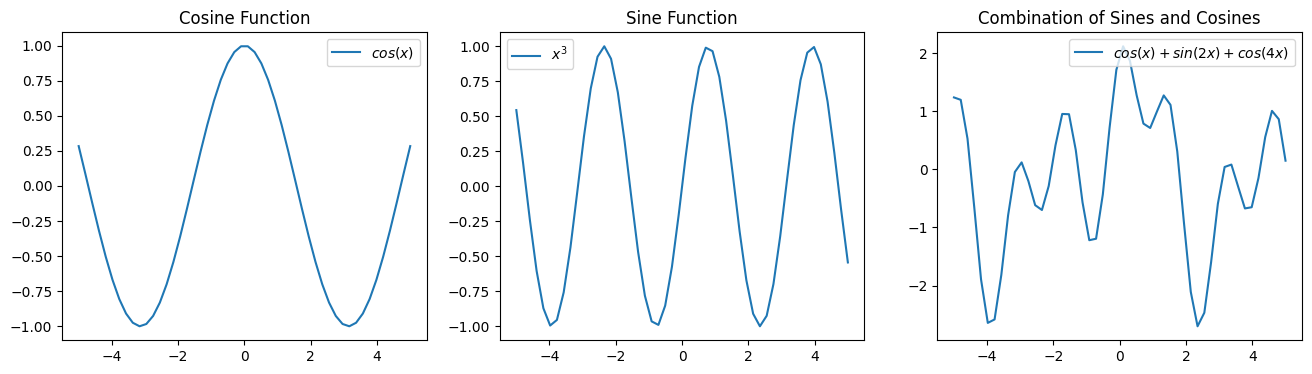

In [29]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-5, 5)

plt.subplot(131)
plt.title('Cosine Function')
plt.plot(x_vars, np.cos(x_vars))
plt.legend(["$cos(x)$"])

plt.subplot(132)
plt.title('Sine Function')
plt.plot(x_vars, np.sin(2*x_vars))
plt.legend(["$x^3$"])

plt.subplot(133)
plt.title('Combination of Sines and Cosines')
plt.plot(x_vars, np.cos(x_vars) + np.sin(2*x_vars) + np.cos(4*x_vars))
plt.legend(["$cos(x) + sin(2x) + cos(4x)$"])

## Part 5: Using scikit-learn to fit Multiple Linear Regression Model

Let's consider the `penguins` dataset.

In [152]:
df = sns.load_dataset("penguins")
df = df[df["species"] == "Adelie"].dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


Suppose we could measure flippers and weight easily, but not bill dimensions.
How can we predict **bill depth** from flipper length and/or body mass?

For demo purposes, we'll drop all columns except the variables whose relationships we're interested in modeling.

In [153]:
df = sns.load_dataset("penguins")
df = df[df["species"] == "Adelie"].dropna()
df = df[["bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
df

,bill_depth_mm,flipper_length_mm,body_mass_g
0,18.7,181.0,3750.0
1,17.4,186.0,3800.0
2,18.0,195.0,3250.0
4,19.3,193.0,3450.0
5,20.6,190.0,3650.0
...,...,...,...
147,18.4,184.0,3475.0
148,17.8,195.0,3450.0
149,18.1,193.0,3750.0
150,17.1,187.0,3700.0


Suppose we want to create a linear regression model that predicts a penguin's **bill depth** $y$ using both their **flipper length** $x_1$ and **body mass** $x_2$, plus an intercept term.

$$\Large \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

<br/><br/>

### Using SKLearn to fit our Multiple Linear Regression Model


An alternate approach to optimize our model is to use the `sklearn.linear_model.LinearRegression` class. [(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

In [32]:
from sklearn.linear_model import LinearRegression

1. **Create an `sklearn` object.**

    First we create a model. At this point the model has not been fit so it has no parameters.

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

2. **`fit` the object to data.**

    Then we "fit" the model, which means computing the parameters that minimize the loss function. The `LinearRegression` class is hard coded to use the **MSE** as its loss function. The first argument of the fit function should be a matrix (or DataFrame), and the second should be the observations we're trying to predict. 

In [34]:
model.fit(
    X=df[["flipper_length_mm", "body_mass_g"]], 
    y=df["bill_depth_mm"])

LinearRegression()

3. **Analyze fit or call `predict`.**

    Now that our model is trained, we can ask it questions. The code below asks the model to estimate the bill depth (in mm) for a penguin with a 185 mm flipper length.

In [35]:
model.predict([[185, 3750.0]]) # note the double brackets

array([18.36187501])

We can also ask the model to generate a series of predictions:

In [36]:
df["sklearn_preds"] = model.predict(df[["flipper_length_mm", "body_mass_g"]])
df

,bill_depth_mm,flipper_length_mm,body_mass_g,sklearn_preds
0,18.7,181.0,3750.0,18.322561
1,17.4,186.0,3800.0,18.445578
2,18.0,195.0,3250.0,17.721412
4,19.3,193.0,3450.0,17.997254
5,20.6,190.0,3650.0,18.263268
...,...,...,...,...
147,18.4,184.0,3475.0,17.945735
148,17.8,195.0,3450.0,18.016911
149,18.1,193.0,3750.0,18.440503
150,17.1,187.0,3700.0,18.307657


Voilà!

**Analyze parameters.**

We can ask the model for its intercept and slope with `_intercept` and `_coef`, respectively.

In [37]:
model.intercept_      # why is this a scalar?

11.002995277447067

In [38]:
model.coef_           # why is this an array?

array([0.00982849, 0.0014775 ])

How are these interpreted?

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

$\theta_0$ is the bill depth of a penguin with 0 mm flipper length and 0 grams mass weight.

$\theta_1$ is how many mm longer is the bill depth, if we increase the flipper length by 1 mm and keeping the mass mixed.

$\theta_2$ is how many mm longer is the bill depth, if we increase the weight by 1 gram and keeping the flipper length fixed.

**Analyze performance.**

The `sklearn` package also provides a function that computes the MSE from a list of observations and predictions. This avoids us having to manually compute MSE by first computing residuals. In the second part of class, we will explore more metrics to assess model performance.

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [39]:
from sklearn.metrics import  mean_squared_error
mean_squared_error(df["bill_depth_mm"], df["sklearn_preds"])

0.9764070438844

## POLL:

<img src="wooclap.png" alt="drawing" width="500"/>

### Is 0.9764 a high value for the squared error?

### A. Yes

### B. No

### C. Can't say for sure

### D. Unicorns are white



## Part 5: Feature Engineering

Feature engineering is the process of applying feature functions to generate new features for use in modeling. We will discuss two aspects:

- One-hot encoding
- Polynomial features

To do so, we will use a dataset from seaborn, `tips`


In [154]:
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None 
warnings.simplefilter(action='ignore', category=UserWarning)
np.random.seed(42)

tips = sns.load_dataset("tips") 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


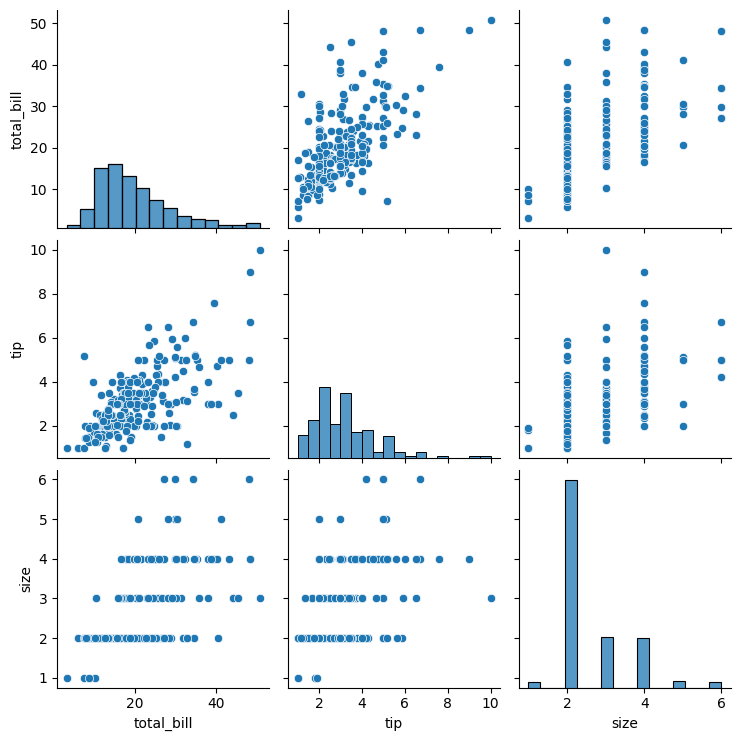

In [156]:
sns.pairplot(tips)

### One-Hot Encoding

We discussed One-Hot Encoding as part of EDA. Here, e.g. we can use one-hot encoding to incorporate the day of the week as an input into a regression model.

Suppose we want to use a design matrix of three features – the `total_bill`, `size`, and `day` – to predict the tip. 

In [157]:
X_raw = tips[["total_bill", "size", "day"]]
y = tips["tip"]

Because `day` is non-numeric, we will apply one-hot encoding before fitting a model.

The `OneHotEncoder` class of `sklearn` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out)) offers a quick way to perform one-hot encoding. Also, note that we follow a very similar workflow to when we were working with the `LinearRegression` class: we initialize a `OneHotEncoder` object, fit it to our data, then use `.transform` to apply the fitted encoder. 

In [158]:
from sklearn.preprocessing import OneHotEncoder

# Initialize a OneHotEncoder object
ohe = OneHotEncoder()

# Fit the encoder
ohe.fit(tips[["day"]])
ohe

OneHotEncoder()

In [159]:
# Use the encoder to transform the raw "day" feature
encoded_day = ohe.transform(tips[["day"]]).toarray()

print("The first 5 rows of the matrix")
encoded_day[:5, :]

The first 5 rows of the matrix


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [161]:
#ohe.transform([['Fun']])

In [162]:
encoded_day_df = pd.DataFrame(encoded_day, columns=ohe.get_feature_names_out())
encoded_day_df.head()

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


The `OneHotEncoder` has converted the categorical `day` feature into four numeric features! Note that the `tips` dataset only included data for Thursday through Sunday, which is why only four days of the week appear. 

Let's join this one-hot encoding to the original data to form our featurized design matrix. We drop the original `day` column so our design matrix only includes numeric values.

In [163]:
X = X_raw.join(encoded_day_df).drop(columns="day")

X.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,2,0.0,0.0,1.0,0.0
1,10.34,3,0.0,0.0,1.0,0.0
2,21.01,3,0.0,0.0,1.0,0.0
3,23.68,2,0.0,0.0,1.0,0.0
4,24.59,4,0.0,0.0,1.0,0.0


Now, we can use `sklearn`'s `LinearRegression` class to fit a model to this design matrix.

In [164]:
from sklearn.linear_model import LinearRegression
ohe_model = LinearRegression(fit_intercept=False) # Tell sklearn to not add an additional bias column. Why?
ohe_model.fit(X, y)

pd.DataFrame({"Feature":X.columns, "Model Coefficient":ohe_model.coef_}).set_index("Feature")

,Model Coefficient
Feature,
total_bill,0.092994
size,0.187132
day_Fri,0.745787
day_Sat,0.621129
day_Sun,0.732289
day_Thur,0.668294


### Polynomial Features

Consider the `vehicles` dataset, which includes information about cars.

In [171]:
vehicles = sns.load_dataset("mpg").dropna().rename(columns = {"horsepower": "hp"}).sort_values("hp")
vehicles.head()

,mpg,cylinders,displacement,hp,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


Suppose we want to use the `hp` (horsepower) of a car to predict its `mpg` (gas mileage in miles per gallon). If we visualize the relationship between these two variables, we see a non-linear curvature. Fitting a linear model to these variables results in a high (poor) value of RMSE. 

$$\hat{y} = \theta_0 + \theta_1 (\text{hp})$$

In [172]:
X = vehicles[["hp"]]
y = vehicles["mpg"]

hp_model = LinearRegression()
hp_model.fit(X, y)
hp_model_predictions = hp_model.predict(X)

print(f"MSE of model with (hp) feature: {np.mean((y-hp_model_predictions)**2)}")

fig = px.scatter(vehicles, x="hp", y="mpg", width=800, height=600)
fig.add_trace(go.Scatter(x=vehicles["hp"], y=hp_model_predictions,
                         mode="lines", name="Linear Prediction"))
#sns.scatterplot(data=vehicles, x="hp", y="mpg")
#plt.plot(vehicles["hp"], hp_model_predictions, c="tab:red");



MSE of model with (hp) feature: 23.943662938603108


To capture the non-linear relationship between the variables, we can introduce a non-linear feature: `hp` squared. Our new model is:

$$\hat{y} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp}^2)$$

In [173]:
X = vehicles[["hp"]]
X.loc[:, "hp^2"] = vehicles["hp"]**2

hp2_model = LinearRegression()
hp2_model.fit(X, y)
hp2_model_predictions = hp2_model.predict(X)


print(f"MSE of model with (hp^2) feature: {np.mean((y-hp2_model_predictions)**2)}")

fig = px.scatter(vehicles, x="hp", y="mpg", width=800, height=600)
fig.add_trace(go.Scatter(x=vehicles["hp"], y=hp2_model_predictions,
                         mode="lines", name="Quadratic Prediction"))
#sns.scatterplot(data=vehicles, x="hp", y="mpg")
#plt.plot(vehicles["hp"], hp2_model_predictions, c="tab:red");


MSE of model with (hp^2) feature: 18.984768907617216


What if we take things further and add even *more* polynomial features?

The cell below fits models of increasing complexity and computes their MSEs.

In [174]:
def mse(predictions, observations):
    return np.mean((observations - predictions)**2)

# Add hp^3 and hp^4 as features to the data
X["hp^3"] = vehicles["hp"]**3
X["hp^4"] = vehicles["hp"]**4

# Fit a model with order 3
hp3_model = LinearRegression()
hp3_model.fit(X[["hp", "hp^2", "hp^3"]], vehicles["mpg"])
hp3_model_predictions = hp3_model.predict(X[["hp", "hp^2", "hp^3"]])

# Fit a model with order 4
hp4_model = LinearRegression()
hp4_model.fit(X[["hp", "hp^2", "hp^3", "hp^4"]], vehicles["mpg"])
hp4_model_predictions = hp4_model.predict(X[["hp", "hp^2", "hp^3", "hp^4"]])

In [175]:
#Visualizing differently:
fig = px.scatter(vehicles, x="hp", y="mpg", width=800, height=600)
fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp_model_predictions, mode="lines", 
    name=f"HP MSE={np.round(mse(vehicles['mpg'], hp_model_predictions),3)}"))
fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp2_model_predictions, mode="lines", 
    name=f"HP^2 MSE={np.round(mse(vehicles['mpg'], hp2_model_predictions),3)}"))
fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp3_model_predictions, mode="lines", 
    name=f"HP^3 MSE={np.round(mse(vehicles['mpg'], hp3_model_predictions),3)}"))
fig.add_trace(go.Scatter(
    x=vehicles["hp"], y=hp4_model_predictions, mode="lines", 
    name=f"HP^4 MSE={np.round(mse(vehicles['mpg'], hp4_model_predictions),3)}"))

## POLL:

<img src="wooclap.png" alt="drawing" width="500"/>

### Which model would you prefer?

### A. degree 1

### B. degree 2

### C. degree 3

### D. degree 4

### E. Unicorns are blue


In [67]:
# Plot the models' predictions
#fig, ax = plt.subplots(1, 3, dpi=200, figsize=(12, 3))
#
#predictions_dict = {0:hp2_model_predictions, 1:hp3_model_predictions, 2:hp4_model_predictions}
#
#for i in predictions_dict:
#    ax[i].scatter(vehicles["hp"], vehicles["mpg"], edgecolor="white", lw=0.5)
#    ax[i].plot(vehicles["hp"], predictions_dict[i], "tab:green")
#    ax[i].set_title(f"Model with order {i+2}")
#    ax[i].set_xlabel("hp")
#    ax[i].set_ylabel("mpg")
#    ax[i].annotate(f"MSE: {np.round(mse(vehicles['mpg'], predictions_dict[i]), 3)}", (120, 40))
#
#plt.subplots_adjust(wspace=0.3);

## Complexity and Overfitting

What we saw above was the phenomenon of **model complexity** – as we add additional features to the design matrix, the model becomes increasingly *complex*. Models with higher complexity have lower values of training error. Intuitively, this makes sense: with more features at its disposal, the model can match the observations in the trainining data more and more closely. 

We can run an experiment to see this in action. In the cell below, we fit many models of progressively higher complexity, then plot the MSE of predictions on the training set. 

The **order** of a polynomial model is the highest power of any term in the model. An order 0 model takes the form $\hat{y} = \theta_0$, while an order 4 model takes the form $\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4$.

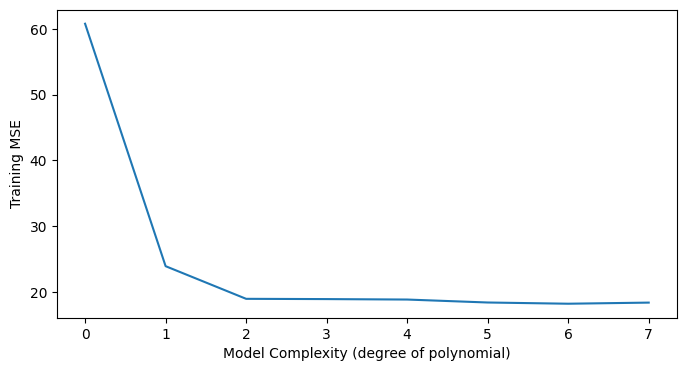

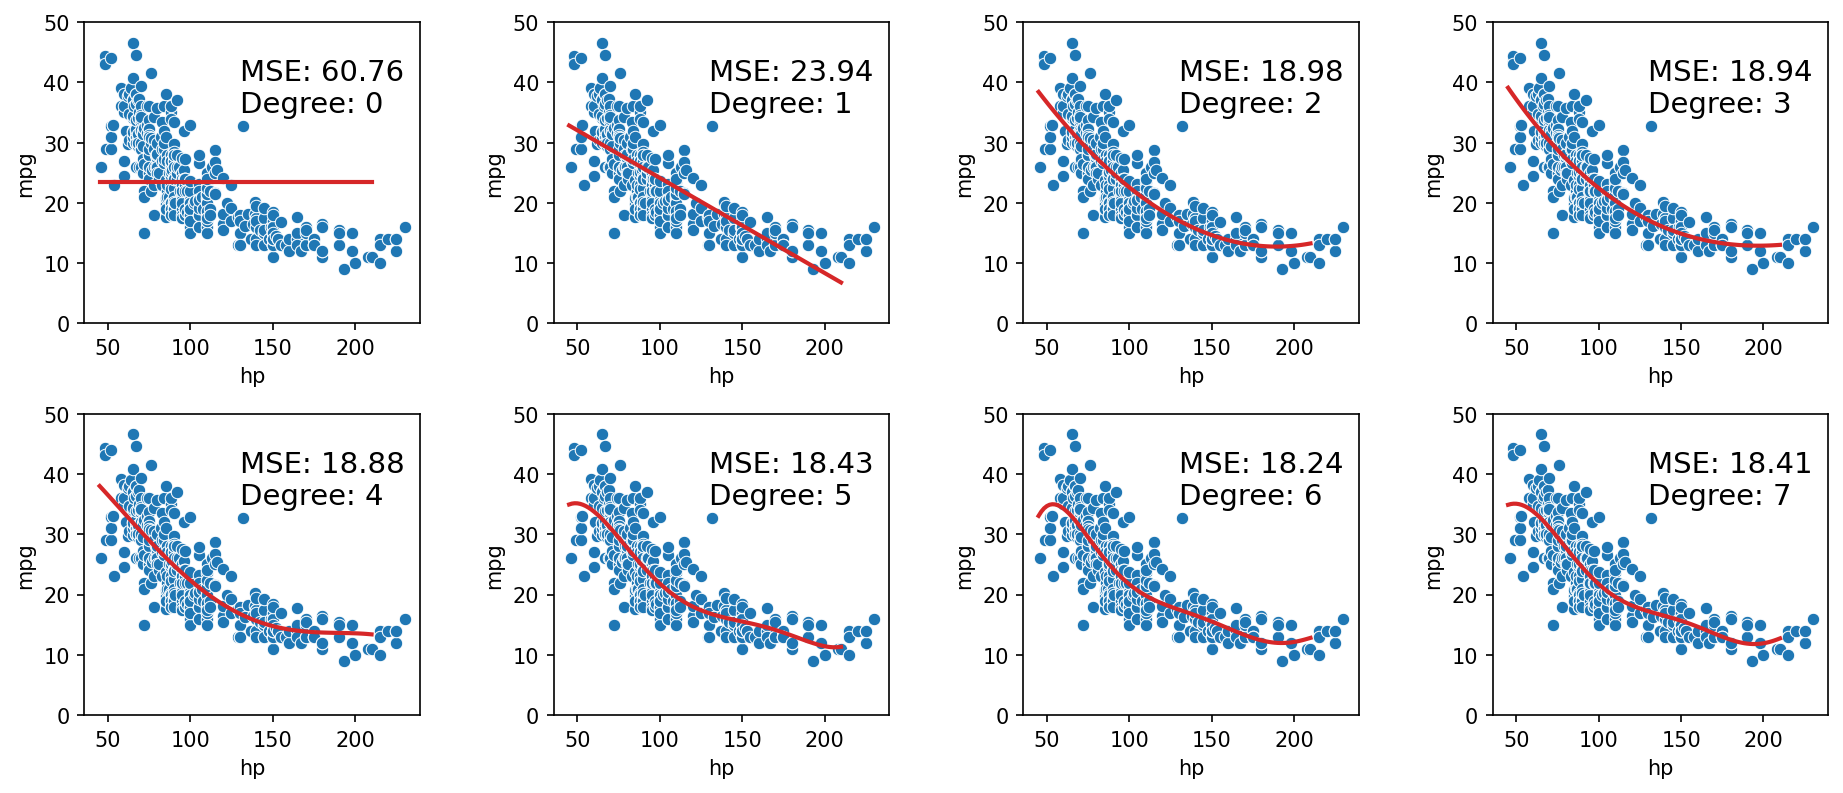

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def fit_model_dataset(degree, dataset):
    pipelined_model = Pipeline([
            ('polynomial_transformation', PolynomialFeatures(degree)),
            ('linear_regression', LinearRegression())    
        ])

    pipelined_model.fit(dataset[["hp"]], dataset["mpg"])
    return mse(dataset['mpg'], pipelined_model.predict(dataset[["hp"]]))

errors = [fit_model_dataset(degree, vehicles) for degree in range(0, 8)]
MSEs_and_k = pd.DataFrame({"k": range(0, 8), "MSE": errors})

plt.plot(range(0, 8), errors)
plt.xlabel("Model Complexity (degree of polynomial)")
plt.ylabel("Training MSE");

def plot_degree_k_model(k, MSEs_and_k, axs):
    pipelined_model = Pipeline([
        ('poly_transform', PolynomialFeatures(degree = k)),
        ('regression', LinearRegression(fit_intercept = True))    
    ])
    pipelined_model.fit(vehicles[["hp"]], vehicles["mpg"])
    
    row = k // 4
    col = k % 4
    ax = axs[row, col]
    
    sns.scatterplot(data=vehicles, x='hp', y='mpg', ax=ax)
    
    x_range = np.linspace(45, 210, 100).reshape(-1, 1)
    ax.plot(x_range, pipelined_model.predict(pd.DataFrame(x_range, columns=['hp'])), c='tab:red', linewidth=2)
    
    ax.set_ylim((0, 50))
    mse_str = f"MSE: {MSEs_and_k.loc[k, 'MSE']:.4}\nDegree: {k}"
    ax.text(130, 35, mse_str, dict(size=14))

fig = plt.figure(figsize=(15, 6), dpi=150)
axs = fig.subplots(nrows=2, ncols=4)

for k in range(8):
    plot_degree_k_model(k, MSEs_and_k, axs)
fig.subplots_adjust(wspace=0.4, hspace=0.3)

You may be tempted to always design models with high polynomial degree – after all, we know that we could theoretically achieve perfect predictions by creating a model with enough polynomial features. 

It turns out that the examples we looked at above represent a somewhat artificial scenario: we trained our model on all the data we had available, then used the model to make predictions on this very same dataset. A more realistic situation is when we wish to apply our model on unseen data – that is, datapoints that it did not encounter during the model fitting process. 

Suppose we obtain a random sample of 6 datapoints from our population of vehicle data. We want to train a model on these 6 points and use it to make predictions on unseen data (perhaps cars for which we don't already know the true `mpg`). 

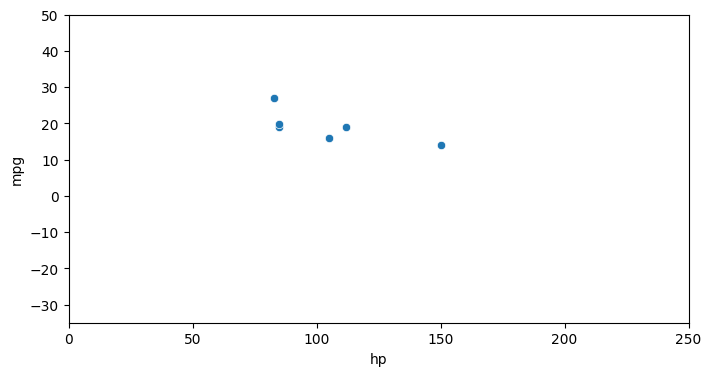

In [177]:
np.random.seed(100)

sample_6 = vehicles.sample(6)

sns.scatterplot(data=sample_6, x="hp", y="mpg")
plt.ylim(-35, 50)
plt.xlim(0, 250);

If we design a model with polynomial degree 5, we can make perfect predictions on this sample of training data.

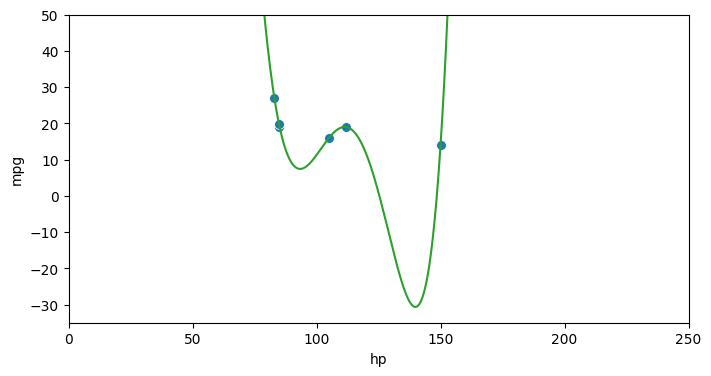

In [56]:
degree_5_model = Pipeline([
                ('polynomial_transformation', PolynomialFeatures(5)),
                ('linear_regression', LinearRegression())    
            ])

degree_5_model.fit(sample_6[["hp"]], sample_6["mpg"])
xs = np.linspace(0, 250, 1000)
degree_5_model_predictions = degree_5_model.predict(xs[:, np.newaxis])

plt.plot(xs, degree_5_model_predictions, c="tab:green")
sns.scatterplot(data=sample_6, x="hp", y="mpg", s=50)
plt.ylim(-35, 50)
plt.xlim(0, 250);

However, when we reapply this fitted model to the full population of data, it fails to capture the major trends of the dataset.

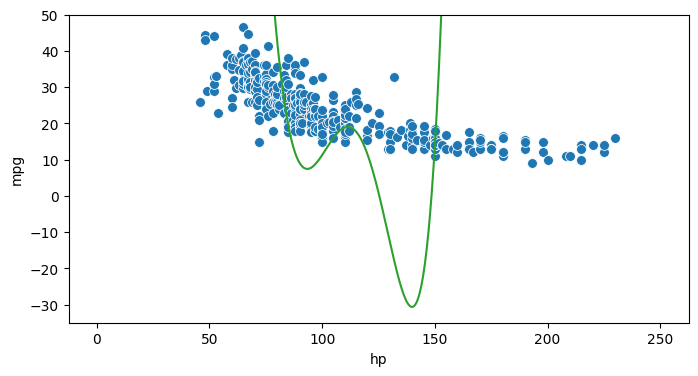

In [57]:
plt.plot(xs, degree_5_model_predictions, c="tab:green")
sns.scatterplot(data=vehicles, x="hp", y="mpg", s=50)
plt.ylim(-35, 50);

The model has **overfit** to the data used to train it. It has essentially "memorized" the six datapoints used during model fitting, and does not generalize well to new data. 

Complex models tend to be more sensitive to the data used to train them. The **variance** of a model refers to its tendency to vary depending on the training data used during model fitting. It turns out that our degree-5 model has very high model variance. If we randomly sample new sets of datapoints to use in training, the model varies erratically. 

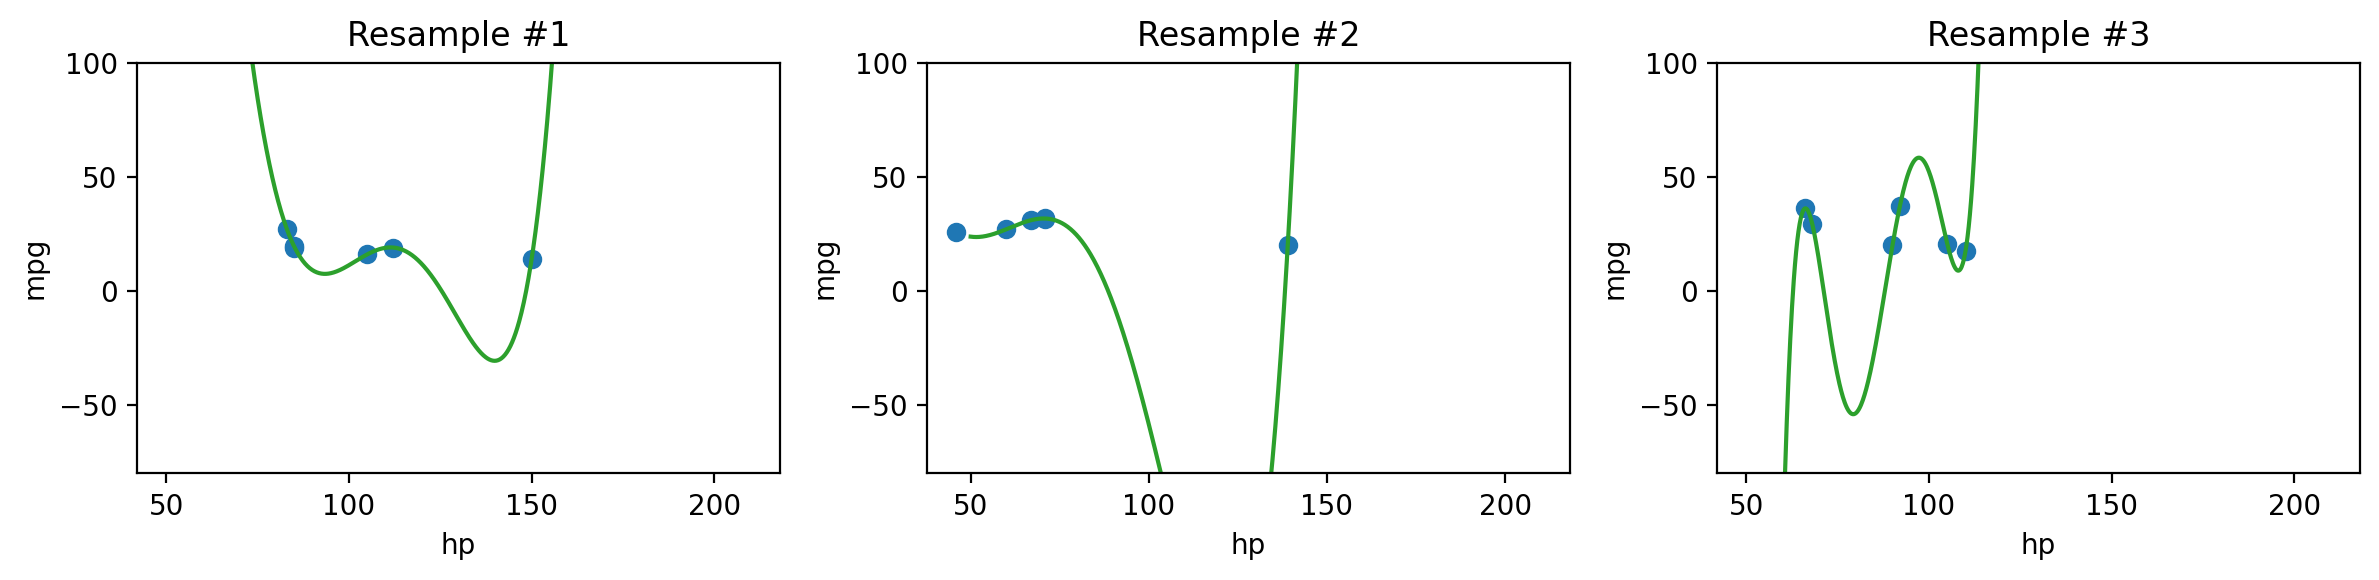

In [58]:
np.random.seed(100)

fig, ax = plt.subplots(1, 3, dpi=200, figsize=(12, 3))

for i in range(0, 3):
    sample = vehicles.sample(6)

    polynomial_model = Pipeline([
                ('polynomial_transformation', PolynomialFeatures(5)),
                ('linear_regression', LinearRegression())    
            ])

    polynomial_model.fit(sample[["hp"]], sample["mpg"])

    ax[i].scatter(sample[["hp"]], sample["mpg"])

    xs = np.linspace(50, 210, 1000)
    ax[i].plot(xs, polynomial_model.predict(xs[:, np.newaxis]), c="tab:green")
    ax[i].set_ylim(-80, 100)
    ax[i].set_xlabel("hp")
    ax[i].set_ylabel("mpg")
    ax[i].set_title(f"Resample #{i+1}")
    
fig.tight_layout();

# Algorithm: Non-Linear Least Squares

* __Type__: Supervised learning (regression)
* __Model family__: Linear in the parameters; non-linear with respect to raw inputs.
* __Features__: Non-linear functions of the attributes (one-hot encoding and polynomails)
* __Objective function__: Mean squared error
* __Optimizer__: Normal equations (or Gradient Descent)